# Köppen-Geiger classification

- Maps for the whole globe and South America.

## Initial setup

In [1]:
# Load packages.
import sys

import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
print(">>> Version of xarray:", xr.__version__)                                

>>> Version of xarray: 0.14.0


In [3]:
# My repository.
repository = "/home/alex/Dropbox/repositories/"

# Include once my repository in the path for searching libraries.
if repository not in sys.path:
    sys.path.append(repository)
    
# Import my package.
import cdlearn

# Map borders.
loni, lonf, lati, latf = -90, -30, 20, -60

# Where figures will be put.
fig_path = "/home/alex/Dropbox/repositories/phd/images/"

In [4]:
# Folder with data.
DATA_FOLDER = "/media/alex/ALEXDATA/data_sets/KOPPEN-GEIGER/"

## Load data

In [5]:
df = pd.read_csv(DATA_FOLDER + "Koeppen-Geiger-ASCII.txt", sep="\s+")
df.rename({"Lat": "latitude", "Lon": "longitude", "Cls": "class_type"}, 
          axis="columns", 
          inplace=True)
old_to_new = {}
for new, old in enumerate(np.sort(df.class_type.unique())):
    old_to_new[old] = new + 1
df["class_num"] = df["class_type"].copy()    
df.class_num.replace(to_replace=old_to_new, inplace=True)
df.head()

,latitude,longitude,class_type,class_num
0,-89.75,-179.75,EF,29
1,-89.75,-179.25,EF,29
2,-89.75,-178.75,EF,29
3,-89.75,-178.25,EF,29
4,-89.75,-177.75,EF,29


In [6]:
df.class_type.unique().size

30

In [7]:
df.class_num.unique().size

30

In [8]:
np.sort(df.class_type.unique())

array(['Af', 'Am', 'As', 'Aw', 'BSh', 'BSk', 'BWh', 'BWk', 'Cfa', 'Cfb',
       'Cfc', 'Csa', 'Csb', 'Csc', 'Cwa', 'Cwb', 'Cwc', 'Dfa', 'Dfb',
       'Dfc', 'Dfd', 'Dsa', 'Dsb', 'Dsc', 'Dwa', 'Dwb', 'Dwc', 'Dwd',
       'EF', 'ET'], dtype=object)

In [9]:
df.longitude.unique().size

720

In [10]:
df.latitude.unique().size

339

In [11]:
# Put data into an xarray DataArray object.
da = df.set_index(["latitude", "longitude"]).to_xarray()
da = da.sortby("latitude", ascending=False)
da

<xarray.Dataset>
Dimensions:     (latitude: 339, longitude: 720)
Coordinates:
  * latitude    (latitude) float64 83.75 83.25 82.75 ... -88.75 -89.25 -89.75
  * longitude   (longitude) float64 -179.8 -179.2 -178.8 ... 178.8 179.2 179.8
Data variables:
    class_type  (latitude, longitude) object nan nan nan nan ... 'EF' 'EF' 'EF'
    class_num   (latitude, longitude) float64 nan nan nan nan ... 29.0 29.0 29.0

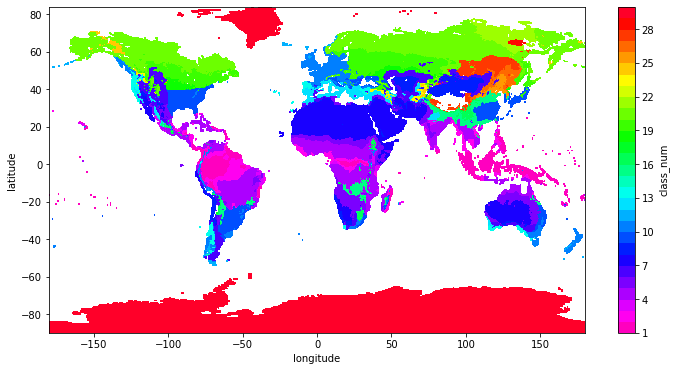

In [12]:
# Global dataset.
da.class_num.plot(figsize=(12, 6),
                  levels=np.arange(1, 31, 1),
                  cmap=plt.cm.gist_rainbow_r,
                  vmin=1,
                  vmax=31);

In [13]:
# South america.
da_sa = da.sel(latitude=slice(lati, latf), longitude=slice(loni, lonf))

In [14]:
da_sa

<xarray.Dataset>
Dimensions:     (latitude: 152, longitude: 120)
Coordinates:
  * latitude    (latitude) float64 19.75 19.25 18.75 ... -54.75 -55.25 -55.75
  * longitude   (longitude) float64 -89.75 -89.25 -88.75 ... -30.75 -30.25
Data variables:
    class_type  (latitude, longitude) object 'Aw' 'Aw' 'Aw' 'Aw' ... nan nan nan
    class_num   (latitude, longitude) float64 4.0 4.0 4.0 4.0 ... nan nan nan

In [15]:
# Count class types in South America.
values = da_sa.class_num.values.flatten()
types = da_sa.class_type.values.flatten()
valid = ~np.isnan(values)
print(">>> South America has", str(np.unique(types[valid]).size), 
      "Köppen-Geiger climate classes!")

>>> South America has 18 Köppen-Geiger climate classes!


In [16]:
np.unique(types[valid])

array(['Af', 'Am', 'As', 'Aw', 'BSh', 'BSk', 'BWh', 'BWk', 'Cfa', 'Cfb',
       'Cfc', 'Csa', 'Csb', 'Csc', 'Cwa', 'Cwb', 'Cwc', 'ET'],
      dtype=object)

In [17]:
np.unique(values[valid])

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 30.])

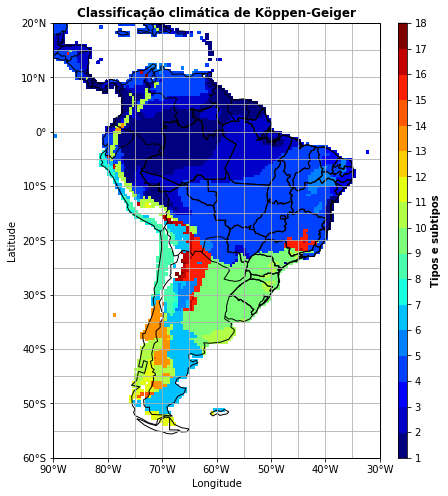

In [18]:
cdlearn.maps.single_map_south_america(
    data_array=da_sa.class_num.where(da_sa.class_num != 30, other=18),
    title="Classificação climática de Köppen-Geiger",
    colorbar_label="Tipos e subtipos",
    vmin=1,
    vmax=18,
    deltav=1,
    levels=np.arange(1, 19, 1),
    cmap=plt.cm.jet
)